In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import xlrd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
data_gsv = df = pd.read_excel("/Users/nataliechang/Desktop/upwork/Upwork Project - Data Analysis.xls", 
                              sheet_name = 'Data - GSV Summary')
data_fa = df = pd.read_excel("/Users/nataliechang/Desktop/upwork/Upwork Project - Data Analysis.xls", 
                              sheet_name = 'Data - Freelancer Activity')
data_gsv

,Month,Region,Category,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value
0,2018-01-01,North America,IT & Programming,10000,4201,6000.0,1200000
1,2018-01-01,EMEA,IT & Programming,1000,450,508.0,50800
2,2018-01-01,North America,Admin,8000,2201,880.0,440000
3,2018-01-01,EMEA,Admin,4000,789,600.0,270000
4,2018-01-01,North America,Design,1000,675,453.0,135900
...,...,...,...,...,...,...,...
139,2019-12-01,EMEA,IT & Programming,2040,390,1056.0,97355
140,2019-12-01,North America,Admin,14281,3298,1601.0,1262308
141,2019-12-01,EMEA,Admin,8627,923,1319.0,776183
142,2019-12-01,North America,Design,1784,1194,824.0,389809


# Compare Region with Time

In [3]:
data_emea = data_gsv[data_gsv['Region']=='EMEA']
data_na = data_gsv[data_gsv['Region']=='North America']

In [4]:
time_emea = data_emea['Gross Services Value'].groupby(data_emea['Month'])
time_na = data_na['Gross Services Value'].groupby(data_na['Month'])
time_emea.mean()
time_na.mean()

Month
2018-01-01    5.919667e+05
2018-02-01    6.224040e+05
2018-03-01    7.434350e+05
2018-04-01    6.602487e+05
2018-05-01    6.739943e+05
2018-06-01    7.911477e+05
2018-07-01    6.855243e+05
2018-08-01    6.968990e+05
2018-09-01    8.055773e+05
2018-10-01    7.876430e+05
2018-11-01    8.020503e+05
2018-12-01    8.170607e+05
2019-01-01    8.328817e+05
2019-02-01    8.498110e+05
2019-03-01    9.852333e+05
2019-04-01    8.551583e+05
2019-05-01    8.883980e+05
2019-06-01    1.049325e+06
2019-07-01    9.008587e+05
2019-08-01    9.417097e+05
2019-09-01    1.100300e+06
2019-10-01    1.072127e+06
2019-11-01    1.120814e+06
2019-12-01    1.171909e+06
Name: Gross Services Value, dtype: float64

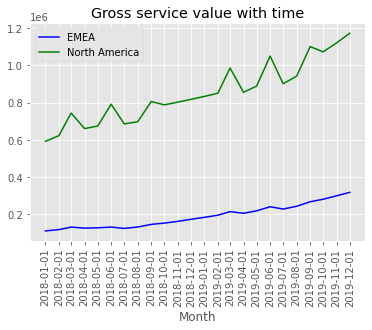

In [5]:
plt.style.use('ggplot')
plt.plot(data_gsv['Month'].unique(), np.array(time_emea.mean()), 'b', label='EMEA')
plt.plot(data_gsv['Month'].unique(), np.array(time_na.mean()), 'g', label='North America')
plt.xlabel('Month')
plt.xticks(data_gsv['Month'].unique(),rotation='vertical')
plt.title('Gross service value with time')
plt.legend(loc = 'upper left')
plt.show()

# Compare 3 category in each region

EMEA

In [6]:
data_emea

,Month,Region,Category,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value
1,2018-01-01,EMEA,IT & Programming,1000,450,508.0,50800
3,2018-01-01,EMEA,Admin,4000,789,600.0,270000
5,2018-01-01,EMEA,Design,100,69,50.3,12575
7,2018-02-01,EMEA,IT & Programming,1050,430,534.0,53934
9,2018-02-01,EMEA,Admin,4200,764,631.0,286790
...,...,...,...,...,...,...,...
135,2019-11-01,EMEA,Admin,8216,879,1255.0,731209
137,2019-11-01,EMEA,Design,459,136,235.0,76066
139,2019-12-01,EMEA,IT & Programming,2040,390,1056.0,97355
141,2019-12-01,EMEA,Admin,8627,923,1319.0,776183


In [7]:
value_emea = data_emea['Gross Services Value'].groupby(data_emea['Category'])
fill_emea = data_emea['Jobs Filled'].groupby(data_emea['Category'])
post_emea = data_emea['Jobs Posted'].groupby(data_emea['Category'])
client_emea = data_emea['Active Clients'].groupby(data_emea['Category'])

value_emea.mean()
fill_emea.mean()
post_emea.mean()
client_emea.mean()

Category
Admin               785.500000
Design               93.583333
IT & Programming    398.291667
Name: Active Clients, dtype: float64

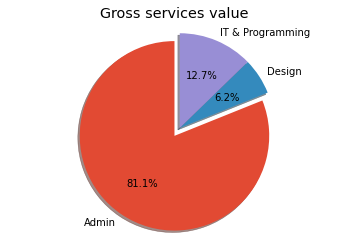

In [8]:
labels = 'Admin', 'Design', 'IT & Programming'
sizes = [459791.25, 35100.375, 72132.375]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Gross services value')
plt.show()

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#langs = ['Admin', 'Design', 'IT & Programming']
#students = [459791.25, 35100.375, 72132.375]
#ax.bar(langs,students)
#plt.show()

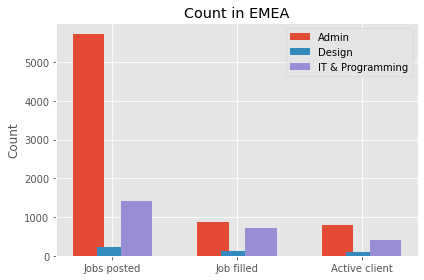

In [9]:
labels = ['Jobs posted', 'Job filled', 'Active client']
ad_means = [5710.333333, 865.958333, 785.5]
de_means = [229.416667, 116.762500, 93.583333]
it_means = [1407.916667, 722.958333, 398.291667]

x = np.arange(len(labels))
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/1.3, ad_means, width, label='Admin')
rects2 = ax.bar(x , de_means, width, label='Design')
rects3 = ax.bar(x + width/1.3, it_means, width, label='IT & Programming')

ax.set_ylabel('Count')
ax.set_title('Count in EMEA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.show()

North America

In [10]:
data_na

,Month,Region,Category,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value
0,2018-01-01,North America,IT & Programming,10000,4201,6000.0,1200000
2,2018-01-01,North America,Admin,8000,2201,880.0,440000
4,2018-01-01,North America,Design,1000,675,453.0,135900
6,2018-02-01,North America,IT & Programming,10300,4039,6185.0,1261740
8,2018-02-01,North America,Admin,8240,2020,907.0,462570
...,...,...,...,...,...,...,...
134,2019-11-01,North America,Admin,13865,3202,1553.0,1200453
136,2019-11-01,North America,Design,1732,1159,799.0,370571
138,2019-12-01,North America,IT & Programming,19276,6452,11789.0,1863610
140,2019-12-01,North America,Admin,14281,3298,1601.0,1262308


In [11]:
value_na = data_na['Gross Services Value'].groupby(data_na['Category'])
fill_na = data_na['Jobs Filled'].groupby(data_na['Category'])
post_na = data_na['Jobs Posted'].groupby(data_na['Category'])
client_na = data_na['Active Clients'].groupby(data_na['Category'])

value_na.mean()
fill_na.mean()
post_na.mean()
client_na.mean()

Category
Admin               2554.958333
Design               967.291667
IT & Programming    4948.166667
Name: Active Clients, dtype: float64

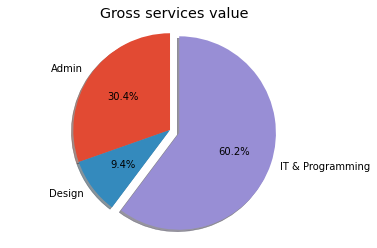

In [12]:
labels = 'Admin', 'Design', 'IT & Programming'
sizes = [7.765126e+05, 2.396894e+05, 1.539608e+06]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Gross services value')
plt.show()

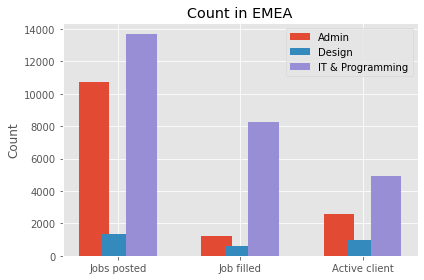

In [13]:
labels = ['Jobs posted', 'Job filled', 'Active client']
ad_means = [10758.875, 1196, 2554.958333]
de_means = [1343.916667, 615.291667, 967.291667]
it_means = [13666.125, 8287.833333, 4948.166667]

x = np.arange(len(labels))
width = 0.25  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/1.3, ad_means, width, label='Admin')
rects2 = ax.bar(x , de_means, width, label='Design')
rects3 = ax.bar(x + width/1.3, it_means, width, label='IT & Programming')

ax.set_ylabel('Count')
ax.set_title('Count in EMEA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.show()

In [14]:
data_gsv['Jobs Filled'].sum() / data_gsv['Jobs Posted'].sum()

0.3564620192803706

In [15]:
data_emea[data_emea['Category']=='IT & Programming']['Gross Services Value'].sum()

1731177

In [16]:
data_emea[data_emea['Category']=='IT & Programming']['Jobs Filled'].sum()/data_emea[data_emea['Category']=='IT & Programming']['Jobs Posted'].sum()

0.5134951168984907

In [17]:
data_emea[data_emea['Category']=='IT & Programming']['Active Clients'].sum()

9559

In [31]:
data_gsv

,Month,Region,Category,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value
0,2018-01-01,North America,IT & Programming,10000,4201,6000.0,1200000
1,2018-01-01,EMEA,IT & Programming,1000,450,508.0,50800
2,2018-01-01,North America,Admin,8000,2201,880.0,440000
3,2018-01-01,EMEA,Admin,4000,789,600.0,270000
4,2018-01-01,North America,Design,1000,675,453.0,135900
...,...,...,...,...,...,...,...
139,2019-12-01,EMEA,IT & Programming,2040,390,1056.0,97355
140,2019-12-01,North America,Admin,14281,3298,1601.0,1262308
141,2019-12-01,EMEA,Admin,8627,923,1319.0,776183
142,2019-12-01,North America,Design,1784,1194,824.0,389809


In [32]:
labelencoder = LabelEncoder()
data_gsv['Region'] = labelencoder.fit_transform(data_gsv['Region'])
data_gsv['Category'] = labelencoder.fit_transform(data_gsv['Category'])
data_gsv

,Month,Region,Category,Jobs Posted,Active Clients,Jobs Filled,Gross Services Value
0,2018-01-01,1,2,10000,4201,6000.0,1200000
1,2018-01-01,0,2,1000,450,508.0,50800
2,2018-01-01,1,0,8000,2201,880.0,440000
3,2018-01-01,0,0,4000,789,600.0,270000
4,2018-01-01,1,1,1000,675,453.0,135900
...,...,...,...,...,...,...,...
139,2019-12-01,0,2,2040,390,1056.0,97355
140,2019-12-01,1,0,14281,3298,1601.0,1262308
141,2019-12-01,0,0,8627,923,1319.0,776183
142,2019-12-01,1,1,1784,1194,824.0,389809


<AxesSubplot:>

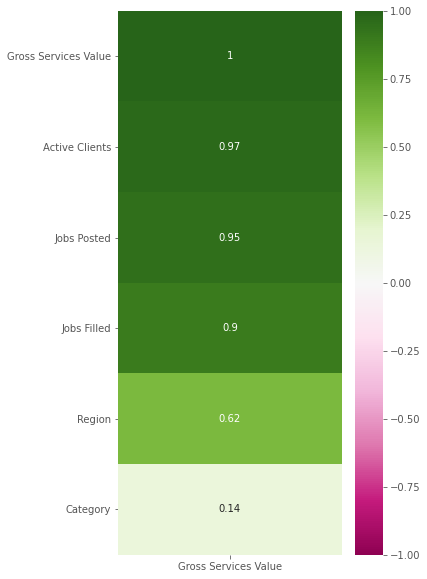

In [34]:
corr_new_train = data_gsv.corr()
plt.figure(figsize=(5,10))
sb.heatmap(corr_new_train[['Gross Services Value']].sort_values(by=['Gross Services Value'],ascending=False).head(10),vmin=-1, cmap='PiYG', annot=True)

In [45]:
df = data_gsv.drop(columns=['Month','Gross Services Value'])

In [46]:
X = np.array(df)
y = np.array(data_gsv['Gross Services Value'])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9705858734881152

In [47]:
reg.coef_

array([ 1.45843300e+04, -4.53829155e+04,  4.02420742e+01,  9.70961503e+01,
        6.02025246e+01])

In [48]:
reg.intercept_

60257.67078420799

Hypothesis Test

In [58]:
rvs1 = np.array(data_gsv[0:72]['Gross Services Value'])
rvs2 = np.array(data_gsv[72:144]['Gross Services Value'])
stats.ttest_ind(rvs1,rvs2) # return statistic, p-value

Ttest_indResult(statistic=-2.0328856113288847, pvalue=0.04392751446234511)

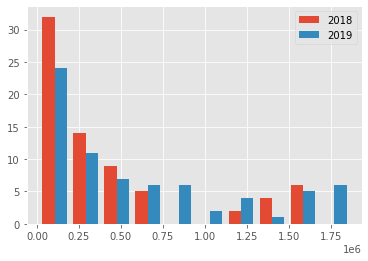

In [60]:
x = rvs1
y = rvs2
#bins = np.linspace(-10, 10, 30)

plt.hist([x, y], label=['2018', '2019'])
plt.legend(loc='upper right')
plt.show()

# Freelancer Analysis

In [18]:
data_fa

,Week,Freelancer Region,Registrations,Applications,Earnings
0,2017-12-30,North America,5983,216600,443975.00000
1,2018-01-06,North America,29061,162450,381818.50000
2,2018-01-13,North America,22752,108300,328541.50000
3,2018-01-20,North America,12801,54150,355180.00000
4,2018-01-27,North America,27182,162822,359745.60000
...,...,...,...,...,...
205,2019-11-30,EMEA,5492,27516,252886.32000
206,2019-12-07,EMEA,3560,17232,224257.68000
207,2019-12-14,EMEA,2037,8473,250023.45600
208,2019-12-21,EMEA,1594,8305,227120.54400


In [19]:
data_fa[data_fa['Freelancer Region']=='North America']

,Week,Freelancer Region,Registrations,Applications,Earnings
0,2017-12-30,North America,5983,216600,443975.00000
1,2018-01-06,North America,29061,162450,381818.50000
2,2018-01-13,North America,22752,108300,328541.50000
3,2018-01-20,North America,12801,54150,355180.00000
4,2018-01-27,North America,27182,162822,359745.60000
...,...,...,...,...,...
100,2019-11-30,North America,21485,97541,931667.65500
101,2019-12-07,North America,15977,65027,826195.84500
102,2019-12-14,North America,6962,32514,921120.47400
103,2019-12-21,North America,6061,27637,836743.02600


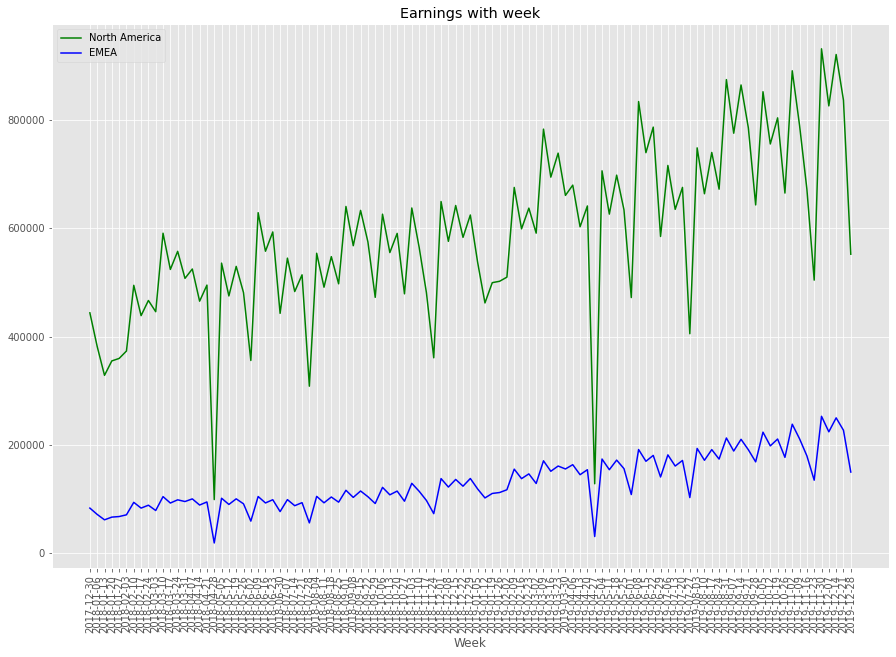

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.plot(data_fa[data_fa['Freelancer Region']=='North America']['Week'], data_fa[data_fa['Freelancer Region']=='North America']['Earnings'], 'g', label='North America')
plt.plot(data_fa[data_fa['Freelancer Region']=='EMEA']['Week'], data_fa[data_fa['Freelancer Region']=='EMEA']['Earnings'], 'b', label='EMEA')
plt.xlabel('Week')
plt.xticks(data_fa[data_fa['Freelancer Region']=='North America']['Week'],rotation='vertical')
plt.title('Earnings with week')
plt.legend(loc = 'upper left')
plt.show()

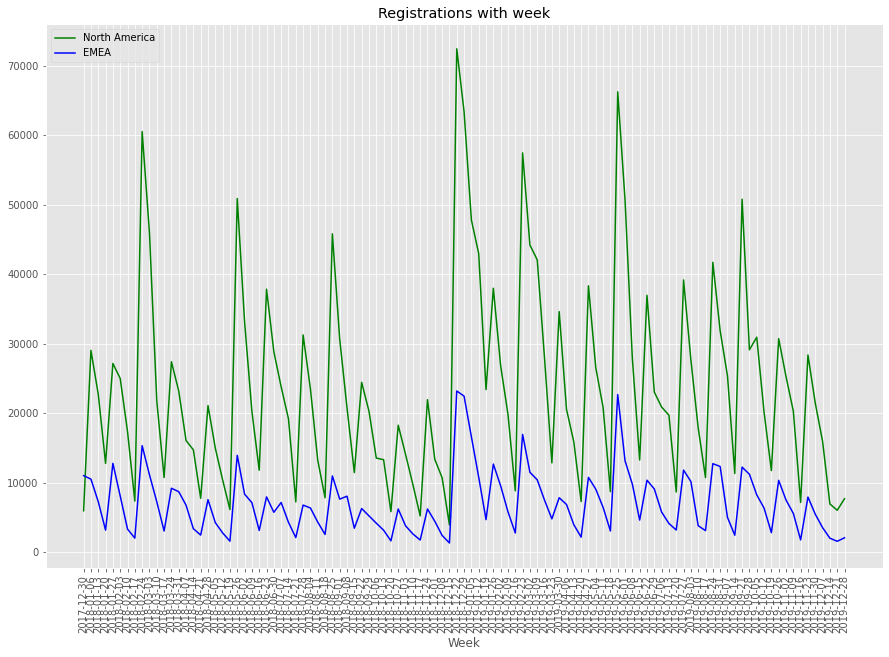

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.plot(data_fa[data_fa['Freelancer Region']=='North America']['Week'], data_fa[data_fa['Freelancer Region']=='North America']['Registrations'], 'g', label='North America')
plt.plot(data_fa[data_fa['Freelancer Region']=='EMEA']['Week'], data_fa[data_fa['Freelancer Region']=='EMEA']['Registrations'], 'b', label='EMEA')
plt.xlabel('Week')
plt.xticks(data_fa[data_fa['Freelancer Region']=='North America']['Week'],rotation='vertical')
plt.title('Registrations with week')
plt.legend(loc = 'upper left')
plt.show()

In [29]:
labelencoder = LabelEncoder()
data_fa['Freelancer Region'] = labelencoder.fit_transform(data_fa['Freelancer Region'])
data_fa

,Week,Freelancer Region,Registrations,Applications,Earnings
0,2017-12-30,1,5983,216600,443975.00000
1,2018-01-06,1,29061,162450,381818.50000
2,2018-01-13,1,22752,108300,328541.50000
3,2018-01-20,1,12801,54150,355180.00000
4,2018-01-27,1,27182,162822,359745.60000
...,...,...,...,...,...
205,2019-11-30,0,5492,27516,252886.32000
206,2019-12-07,0,3560,17232,224257.68000
207,2019-12-14,0,2037,8473,250023.45600
208,2019-12-21,0,1594,8305,227120.54400


<AxesSubplot:>

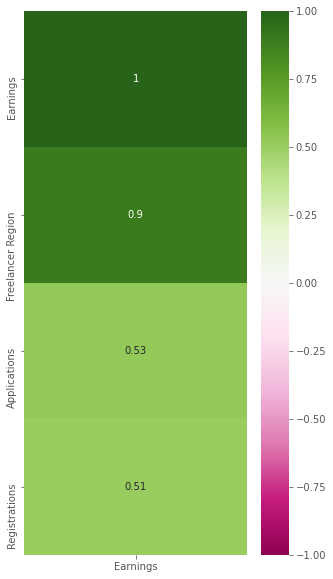

In [30]:
corr_new_train = data_fa.corr()
plt.figure(figsize=(5,10))
sb.heatmap(corr_new_train[['Earnings']].sort_values(by=['Earnings'],ascending=False).head(10),vmin=-1, cmap='PiYG', annot=True)

In [39]:
df2 = data_fa.drop(columns=['Week','Earnings'])

In [41]:
X = np.array(df2)
y = np.array(data_fa['Earnings'])
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8037649950487211

In [42]:
reg.coef_

array([ 4.76970445e+05,  9.41062715e-01, -3.93866833e-01])

In [43]:
reg.intercept_

137890.9216244945